# Application 1: Farm Scale Soil Moisture Estimation using Remote Sensing and Water Budget Products
## Step 2: Implementing a Machine Learning algorithm (The Relevance Vector Machine) 

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a machine learning algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.

In this case, we are going to use the Relevance Vector Machine algorithm. You can read the original paper here: https://www.jmlr.org/papers/volume1/tipping01a/tipping01a.pdf. This algorithm is a good example of a "classical machine learning", different of more recent algorithms such as Deep Learning (e.g. Convolutional Neural Networks). The advanatage of classical machine learning is the need of much less information than deep learning algorithms.

Let's install the necessary python library. Open the terminal and pass the following command.

pip install sklearn_rvm

Let's start importing the csv files generated in Step 1:

In [69]:
import pandas as pd
sm_data_may_13 = pd.read_csv('./Results Step 1/landsat7_may_13_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_may_13.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,900,756,3735,1908,2955,879,0_0,642
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,900,807,3666,2039,2960,1044,1_0,667
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,1070,862,3416,1938,2965,976,2_0,751


In [70]:
import pandas as pd
sm_data_may_29 = pd.read_csv('./Results Step 1/landsat7_may_29_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_may_29.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,612,452,4921,1824,2980,742,0_0,369
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,693,525,4617,1921,2985,904,1_0,394
2,29.27,105A,0.65,28.20,26.10,corn,0.24,0.07,0.50,0.56,...,5,3.73,2158,2542,3257,3850,3081,3225,4_0,1646


In [71]:
import pandas as pd
sm_data_jun_14 = pd.read_csv('./Results Step 1/landsat7_jun_14_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_jun_14.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,1343,1434,3716,3115,3077,1896,0_0,939
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,1317,1458,3716,3083,3081,1928,1_0,915
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,973,999,3308,1728,3005,1041,2_0,655


In [72]:
import pandas as pd
sm_data_jun_30 = pd.read_csv('./Results Step 1/landsat7_jun_30_sm_pixels.csv')
# sm_data['sampling point'] = pd.to_numeric(sm_data['sampling point'],errors='coerce')
sm_data_jun_30.head(3)

,T0630,FIELD,SM0630,T0614,T0513,CROP,SM0529,SM0513,SA0529,SM0614,...,sampling p,SA0630,B2,B3,B4,B5,B6,B7,system:index,B1
0,28.97,101A,0.13,23.77,24.93,alfalfa,0.14,0.39,0.09,0.10,...,1,0.05,1132,1196,3864,2742,3067,1571,0_0,731
1,29.10,101B,0.13,24.90,25.20,alfalfa,0.15,0.32,0.07,0.11,...,2,0.05,1132,1171,3966,2645,3072,1472,1_0,731
2,28.50,104A,0.08,25.87,25.37,grain,0.54,0.50,0.36,0.29,...,3,0.01,1264,1680,3217,2288,3118,1472,2_0,803


Let's extract the inputs and outputs

In [73]:
landsat7_may_13_sm_pixels=sm_data_may_13[['B1','B2','B3','B4','B5','B6','B7','SM0513']]
landsat7_may_29_sm_pixels=sm_data_may_29[['B1','B2','B3','B4','B5','B6','B7','SM0529']]
landsat7_jun_14_sm_pixels=sm_data_jun_14[['B1','B2','B3','B4','B5','B6','B7','SM0614']]
landsat7_jun_30_sm_pixels=sm_data_jun_30[['B1','B2','B3','B4','B5','B6','B7','SM0630']]

landsat7_may_29_sm_pixels.head(3)

,B1,B2,B3,B4,B5,B6,B7,SM0529
0,369,612,452,4921,1824,2980,742,0.14
1,394,693,525,4617,1921,2985,904,0.15
2,1646,2158,2542,3257,3850,3081,3225,0.24


The columns B1 to B7 are scaled based on Landsat metadata. https://developers.google.com/earth-engine/datasets/catalog/LANDSAT_LE07_C01_T1_SR#bands

Let's rescale them.

In [74]:
landsat7_may_13_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_may_13_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_may_13_sm_pixels[['B6']] =landsat7_may_13_sm_pixels[['B6']].multiply(0.0001, axis="index")

landsat7_may_29_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_may_29_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_may_29_sm_pixels[['B6']] =landsat7_may_29_sm_pixels[['B6']].multiply(0.0001, axis="index")

landsat7_jun_14_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_jun_14_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_jun_14_sm_pixels[['B6']] =landsat7_jun_14_sm_pixels[['B6']].multiply(0.0001, axis="index")

landsat7_jun_30_sm_pixels[['B1','B2','B3','B4','B5','B7']] =landsat7_jun_30_sm_pixels[['B1','B2','B3','B4','B5','B7']].multiply(0.0001, axis="index")
landsat7_jun_30_sm_pixels[['B6']] =landsat7_jun_30_sm_pixels[['B6']].multiply(0.0001, axis="index")

landsat7_may_29_sm_pixels.head(3)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,B1,B2,B3,B4,B5,B6,B7,SM0529
0,0.0369,0.0612,0.0452,0.4921,0.1824,0.2980,0.0742,0.14
1,0.0394,0.0693,0.0525,0.4617,0.1921,0.2985,0.0904,0.15
2,0.1646,0.2158,0.2542,0.3257,0.3850,0.3081,0.3225,0.24


Now let's combine them all

In [75]:
sm_data_may_13 = landsat7_may_13_sm_pixels.rename({'SM0513': 'SM'}, axis=1)

sm_data_may_29 = landsat7_may_29_sm_pixels.rename({'SM0529': 'SM'}, axis=1)

sm_data_jun_14 = landsat7_jun_14_sm_pixels.rename({'SM0614': 'SM'}, axis=1)

sm_data_jun_30 = landsat7_jun_30_sm_pixels.rename({'SM0630': 'SM'}, axis=1)

sm_data_jun_30.head(3)

,B1,B2,B3,B4,B5,B6,B7,SM
0,0.0731,0.1132,0.1196,0.3864,0.2742,0.3067,0.1571,0.13
1,0.0731,0.1132,0.1171,0.3966,0.2645,0.3072,0.1472,0.13
2,0.0803,0.1264,0.1680,0.3217,0.2288,0.3118,0.1472,0.08


In [76]:
sm=pd.concat([sm_data_may_13,sm_data_may_29])
sm=pd.concat([sm,sm_data_jun_14])
sm=pd.concat([sm,sm_data_jun_30])

sm

,B1,B2,B3,B4,B5,B6,B7,SM
0,0.0642,0.0900,0.0756,0.3735,0.1908,0.2955,0.0879,0.39
1,0.0667,0.0900,0.0807,0.3666,0.2039,0.2960,0.1044,0.32
2,0.0751,0.1070,0.0862,0.3416,0.1938,0.2965,0.0976,0.50
3,0.0800,0.1043,0.0886,0.3485,0.1938,0.2970,0.0976,0.47
4,0.1319,0.1670,0.2001,0.2589,0.3233,0.3136,0.2846,0.07
...,...,...,...,...,...,...,...,...
15,0.0443,0.0786,0.0539,0.5458,0.2191,0.3039,0.0978,0.17
16,0.0780,0.1132,0.1269,0.4374,0.3034,0.3114,0.1736,0.11
17,0.0851,0.1291,0.1414,0.4510,0.3293,0.3118,0.1868,0.08
18,0.0491,0.0786,0.0661,0.4679,0.2029,0.3039,0.0912,0.16


Let's asses the relationship among the bands and soil moisture

Text(0.5, 1.0, 'SM vs SW2')

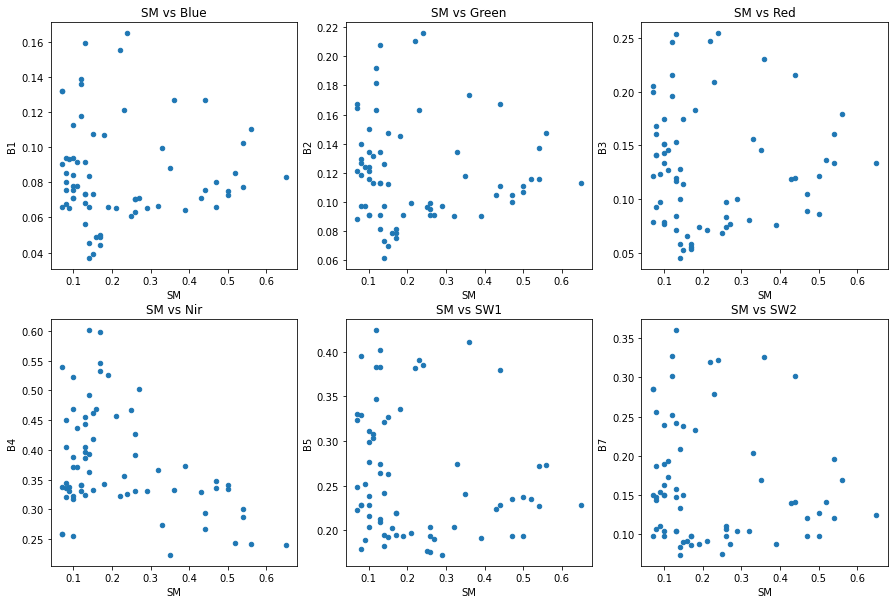

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))

sm.plot(ax=axes[0,0],x ='SM', y='B1', kind = 'scatter'); axes[0,0].set_title('SM vs Blue')
sm.plot(ax=axes[0,1],x ='SM', y='B2', kind = 'scatter'); axes[0,1].set_title('SM vs Green')
sm.plot(ax=axes[0,2],x ='SM', y='B3', kind = 'scatter'); axes[0,2].set_title('SM vs Red')
sm.plot(ax=axes[1,0],x ='SM', y='B4', kind = 'scatter'); axes[1,0].set_title('SM vs Nir')
sm.plot(ax=axes[1,1],x ='SM', y='B5', kind = 'scatter'); axes[1,1].set_title('SM vs SW1')
sm.plot(ax=axes[1,2],x ='SM', y='B7', kind = 'scatter'); axes[1,2].set_title('SM vs SW2')

In the figure above, let's look for patterns (e.g. a linear trend). Which bands relate more to SM?. Let's look at the thermal information too.

Text(0.5, 1.0, 'SM vs Temp')

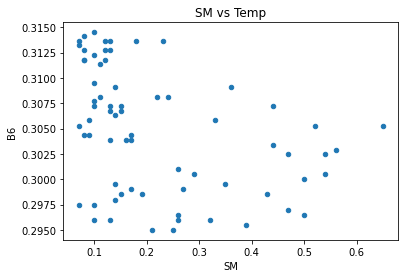

In [78]:
sm.plot(x ='SM', y='B6', kind = 'scatter').set_title('SM vs Temp')


We can see that a) there is no a "linear" relationship between any band and soil moisture and b) In the plots "SM vs NIR", "SM vs Temp", "SM vs SW1" and "SM vs SW2" se "see" a sort of "triangle" shape. This last data behavoir is what created the original "Triangle Method" to estimate plant water use and soil moisture. Paper here: https://www.mdpi.com/1424-8220/7/8/1612 

## Setting Up the Relevance Vector Machine
Now that the data is in the adequate format (a table), we will run the RVM algorithm. The bands will be inputs (x) and soil moisture the output (y)

Note: if the cell below does not run, go to the terminal and pass this command:

pip install sklearn_rvm

In [79]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn_rvm import EMRVR

x_train=sm[['B1','B2','B3','B4','B5','B6','B7']].to_numpy()
y_train=sm[['SM']].to_numpy()

xl = np.linspace(1, len(y_train), len(y_train))


model = EMRVR(kernel='rbf', gamma='auto',bias_used=False)
model.fit(x_train, y_train.ravel())

y, y_std = model.predict(x_train, return_std=True)

Let's plot the results

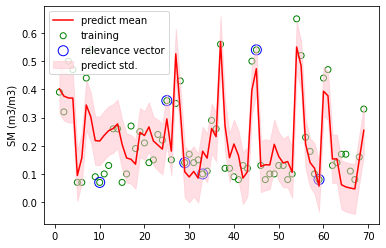

In [80]:
plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

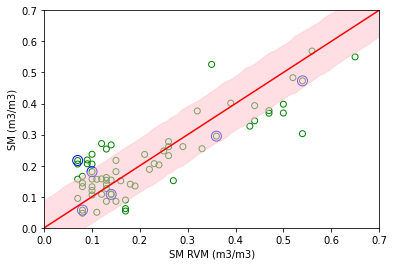

In [81]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')


In [82]:
import math
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y)
rmse = math.sqrt(mse)
print('RMSE = %.2f' %rmse, "m3/m3")

RMSE = 0.08 m3/m3


In [83]:
r2 = r2_score(y_train, y)
print("r2 =%.2f" %r2)

r2 =0.72


We have two questions: Which of the variables can best represent the variability in soil moisture and how we deal with a small number of variables.

For the first question, we can test each of the variables indivudually and then combine the most promissing.

For the second question, we need to use a concept called "CrossValidation". We will divide the total number of samples and change training and testing groups for "n" times, while tracking a goodness of fit statistic, like Mean Square Error or Coefficient of Determination (r2).

Let's implement this for Band 1 (blue)

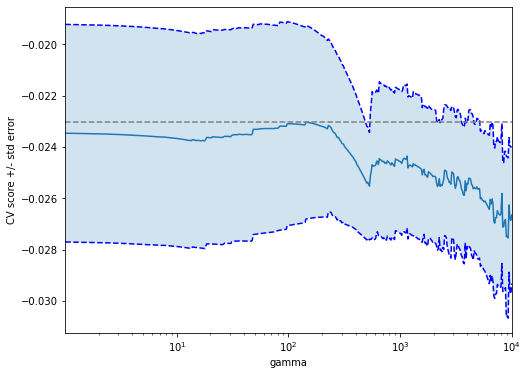

In [84]:
from sklearn.model_selection import GridSearchCV

X=sm[['B1']].to_numpy()
# X = np.reshape(X, (-1, 1))


gammas = np.logspace(0.001,4,500)

tuned_parameters = [{'gamma': gammas}]
n_folds = 4

model = EMRVR(kernel='rbf', bias_used=False)
clf = GridSearchCV(model,tuned_parameters, cv=n_folds, n_jobs = -1, refit=False,scoring='neg_mean_squared_error')


clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(gammas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(gammas, scores + std_error, 'b--')
plt.semilogx(gammas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(gammas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('gamma')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([gammas[0], gammas[-1]])
# plt.ylim([0, 1])



plt.show()

Identifying the best RVM parameter (gamma)

In [85]:
B1_gamma_sel = gammas[scores == np.max(scores)]
print(B1_gamma_sel[0])

146.1462160037123


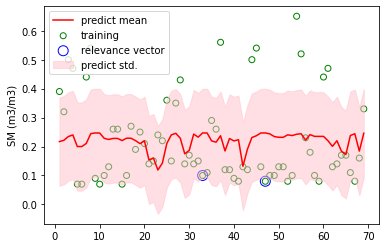

In [86]:
model = EMRVR(kernel='rbf', gamma=B1_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

In [87]:
mse = mean_squared_error(y_train, y)
B1_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B1_rmse, "m3/m3")

RMSE = 0.15 m3/m3


In [88]:
B1_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B1_r2)

r2 =0.02


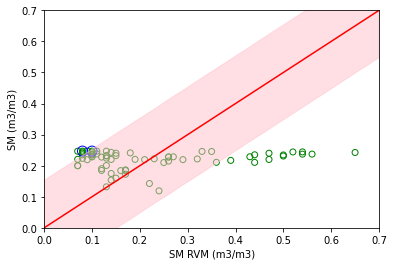

In [89]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')

Let's do the same for all the other inputs

In [90]:
X=sm[['B2']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B2_gamma_sel = gammas[scores == np.max(scores)]
print(B2_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B2_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B2_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B2_rmse, "m3/m3")

B2_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B2_r2)

4692.72224443284
RMSE = 0.13 m3/m3
r2 =0.26


In [91]:
X=sm[['B3']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B3_gamma_sel = gammas[scores == np.max(scores)]
print(B3_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B3_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B3_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B3_rmse, "m3/m3")

B3_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B3_r2)

31.017673376223755
RMSE = 0.15 m3/m3
r2 =0.02


In [92]:
X=sm[['B4']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B4_gamma_sel = gammas[scores == np.max(scores)]
print(B4_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B4_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B4_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B4_rmse, "m3/m3")

B4_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B4_r2)

53.95479665665409
RMSE = 0.13 m3/m3
r2 =0.22


In [93]:
X=sm[['B5']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B5_gamma_sel = gammas[scores == np.max(scores)]
print(B5_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B5_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B5_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B5_rmse, "m3/m3")

B5_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B5_r2)

6.583106206798138
RMSE = 0.15 m3/m3
r2 =0.03


In [94]:
X=sm[['B6']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B6_gamma_sel = gammas[scores == np.max(scores)]
print(B6_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B6_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B6_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B6_rmse, "m3/m3")

B6_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B6_r2)

5748.825924339471
RMSE = 0.14 m3/m3
r2 =0.21


In [95]:
X=sm[['B7']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B7_gamma_sel = gammas[scores == np.max(scores)]
print(B7_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B7_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B7_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B7_rmse, "m3/m3")

B7_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B7_r2)

143.47411253935795
RMSE = 0.15 m3/m3
r2 =0.06


Using the three best bands

In [105]:
X=sm[['B1','B3','B2','B4','B5','B6', 'B7']].to_numpy()

clf.fit(X, y_train.ravel())
scores = clf.cv_results_['mean_test_score']

B7_gamma_sel = gammas[scores == np.max(scores)]
print(B7_gamma_sel[0])

model = EMRVR(kernel='rbf', gamma=B7_gamma_sel[0],bias_used=False)
model.fit(X, y_train.ravel())

y, y_std = model.predict(X, return_std=True)

mse = mean_squared_error(y_train, y)
B7_rmse = math.sqrt(mse)
print('RMSE = %.2f' %B7_rmse, "m3/m3")

B7_r2 = r2_score(y_train, y)
print("r2 =%.2f" %B7_r2)

8.064643431479114
RMSE = 0.07 m3/m3
r2 =0.77


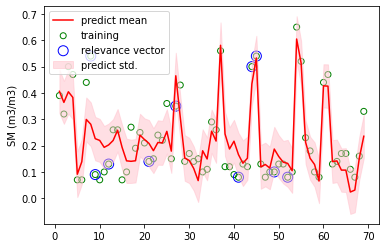

In [106]:
plt.scatter(xl, y_train, facecolor='none', edgecolor='g', label='training')
plt.scatter(xl[model.relevance_], y_train[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')
plt.plot(xl[:, None], y, color='r', label='predict mean')
plt.fill_between(xl, y - y_std, y + y_std, color='pink', alpha=0.5, label='predict std.')
plt.legend(loc='best')
plt.ylabel("SM (m3/m3)")

plt.show()

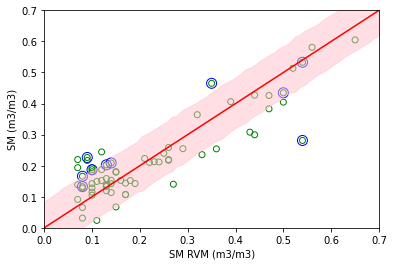

In [107]:
plt.scatter(y_train,y, facecolor='none', edgecolor='g')
plt.scatter(y_train[model.relevance_], y[model.relevance_], s=100, facecolor='none', edgecolor='b', label='relevance vector')

plt.xlabel("SM RVM (m3/m3)")
plt.ylabel("SM (m3/m3)")

axes = plt.gca()
axes.set_xlim([0,0.7])
axes.set_ylim([0,0.7])

xx = np.linspace(0,0.7,len(y))
yx = xx
plt.plot(xx, yx, '-r', label='y=x')
plt.fill_between(xx, yx - y_std, yx + y_std, color='pink', alpha=0.5, label='predict std.')

We found a winner! In the next step we will apply this RVM model to all four Landsat images 